In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import yfinance as yf #Si no se cuenta con esta librería se deberá instalar utilizando 'pip install yfinance'

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
# Leemos el índice S&P500, este será nuestro benchmark
benchmark_data = yf.Ticker('^GSPC').history(period='max')[['Close']]
benchmark_data.index = benchmark_data.index.strftime('%Y-%m-%d')

# ingresar la cantidad de acciones a analizar
n = int(input("¿Cuántas acciones desea analizar? "))

# Creamos un diccionario vacío para almacenar los datos de cada acción
datasets = {}

# ingresar el símbolo de cada acción y almacenamos los datos en el diccionario
for i in range(n):
    accion = input("Ingrese el símbolo de la acción {}:".format(i+1))
    ticker = yf.Ticker(accion)
    dataframe = ticker.history(period='max')
    dataframe.index = dataframe.index.strftime('%Y-%m-%d')
    datasets[accion] = pd.DataFrame(dataframe['Close'])
    
#Corremos un bucle para reemplazar la columna Close, por el nombre de cada dataset
for name, df in datasets.items():
    df.rename(columns={'Close': name}, inplace=True)

#Corremos un pucle para asignar cada dataset diccionario "datasets" a una variable cuyo nombre es la clave correspondiente del diccionario. 
for key, value in datasets.items():
    globals()[key] = value

¿Cuántas acciones desea analizar? 5
Ingrese el símbolo de la acción 1:AAPL
Ingrese el símbolo de la acción 2:GOOGL
Ingrese el símbolo de la acción 3:META
Ingrese el símbolo de la acción 4:MSFT
Ingrese el símbolo de la acción 5:AMZN


In [3]:
# Unimos los datasets en el índice
stocks_data = AAPL.merge(AMZN, left_index=True, right_index=True)\
                  .merge(GOOGL, left_index=True, right_index=True)\
                  .merge(MSFT, left_index=True, right_index=True)\
                  .merge(META, left_index=True, right_index=True)

# Mostrar el resultado
print(stocks_data.head())

                 AAPL     AMZN      GOOGL       MSFT       META
Date                                                           
2012-05-18  16.122011  10.6925  15.025025  23.721561  38.230000
2012-05-21  17.061277  10.9055  15.368118  24.110575  34.029999
2012-05-22  16.930264  10.7665  15.035035  24.118681  31.000000
2012-05-23  17.343361  10.8640  15.251752  23.591888  32.000000
2012-05-24  17.184080  10.7620  15.106607  23.559479  33.029999


In [4]:
# Ingresar año de inicio y fin para filtrar los datos
start_year = str(input("Introduzca el año de inicio (en formato YYYY): "))
end_year = str(input("Introduzca el año de fin (en formato YYYY): "))

# Convertir los años del dataset 'stocks_data' de fecha para poder filtrar por rango de fechas
start_date_benchmark = start_year + '-01-01'
end_date_benchmark = end_year + '-12-31'

benchmark_data = benchmark_data.loc[start_date_benchmark:end_date_benchmark]

# Convertir los años del dataset 'stocks_data' de fecha para poder filtrar por rango de fechas
start_date_stocks = start_year + '-01-01'
end_date_stocks = end_year + '-12-31'

# Filtrar los datos por rango de fechas
stocks_data = stocks_data.loc[start_date_stocks:end_date_stocks]

Introduzca el año de inicio (en formato YYYY): 2022
Introduzca el año de fin (en formato YYYY): 2022


C:\Users\usuario\AppData\Local\Temp\ipykernel_12372\512496603.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  stocks_data.plot(title='Datos de las acciones', subplots=True, lw=2, ax=ax)


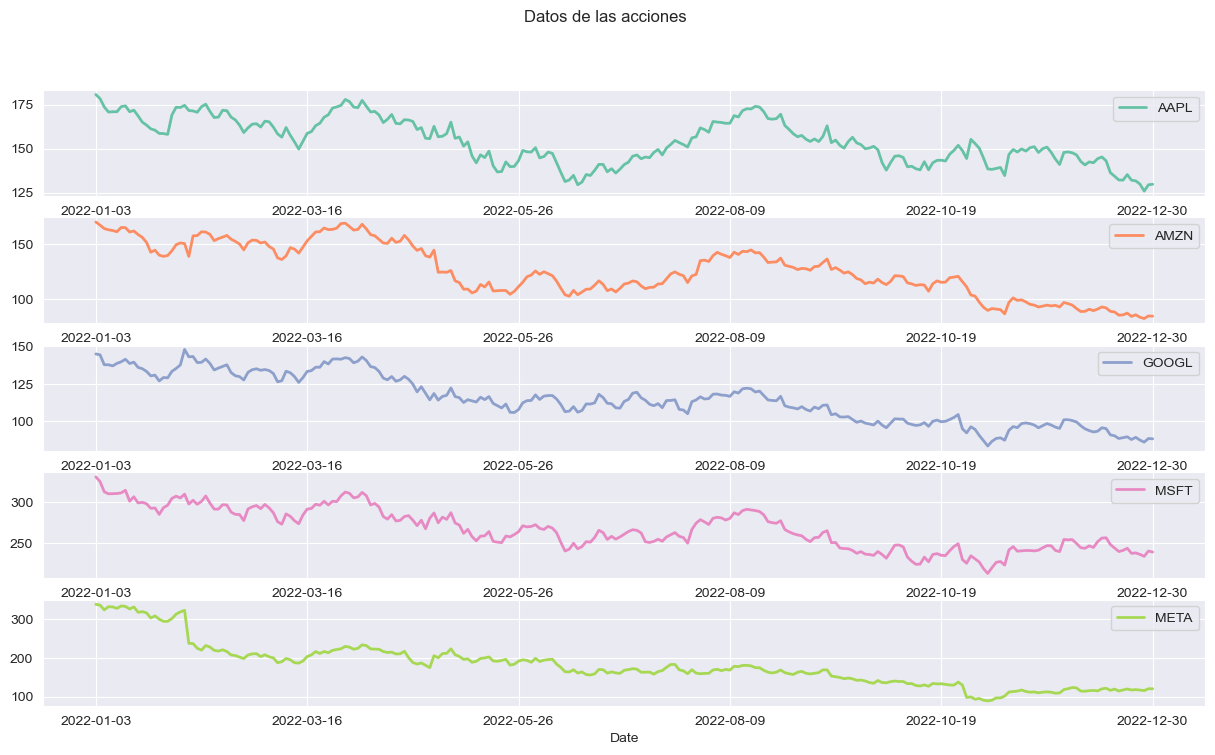

             AAPL        AMZN       GOOGL        MSFT        META
count  251.000000  251.000000  251.000000  251.000000  251.000000
mean   154.146563  126.098819  114.760371  266.873976  180.187690
std     12.825978   23.904315   16.109141   24.950682   56.658923
min    125.847855   81.820000   83.430000  213.114120   88.910004
25%    144.239494  108.889500  100.879997  245.807587  138.059998
50%    153.387222  122.769997  113.891998  263.930084  170.160004
75%    165.019600  145.857506  129.215500  287.030869  207.655006
max    180.683868  170.404495  148.000000  330.813843  338.540009


In [5]:
# Visualizamos los datos de las Acciones
fig, ax = plt.subplots(figsize=(15, 8))
stocks_data.plot(title='Datos de las acciones', subplots=True, lw=2, ax=ax)
plt.show()


# Datos estadísticos sumarios de las acciones
print(stocks_data.describe())

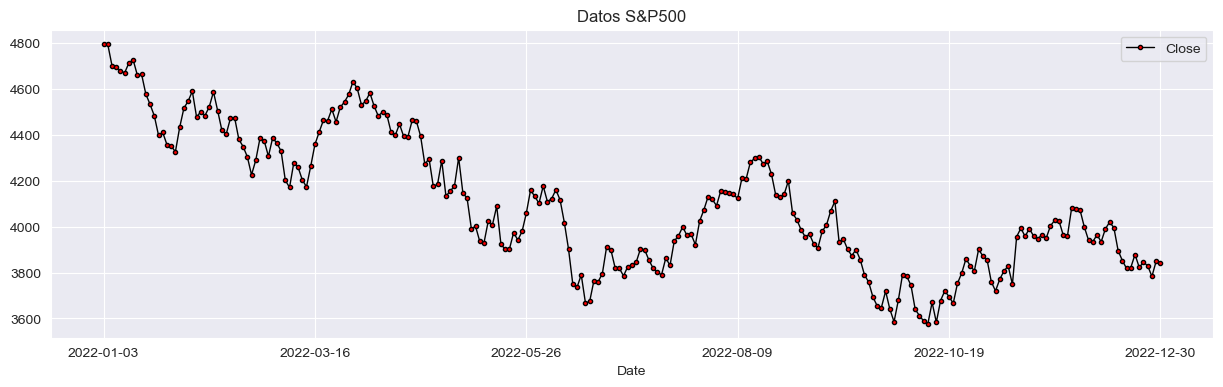

             Close
count   251.000000
mean   4098.514748
std     291.830195
min    3577.030029
25%    3861.135010
50%    4027.260010
75%    4338.870117
max    4796.560059


In [6]:
# Graficamos los datos de nuestra referencia (S&P 500)
fig, ax = plt.subplots(figsize=(15, 4))
benchmark_data.plot(marker='o',markersize=3,markerfacecolor='r', title='Datos S&P500', lw=1, ax=ax, color='k')
plt.show()


# Datos estadísticos sumarios de (S&P 500)
print(benchmark_data.describe())

C:\Users\usuario\AppData\Local\Temp\ipykernel_12372\563867261.py:6: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  stocks_returns.plot(marker='o',markersize=2,markerfacecolor='k',title='Retornos diarios de "Apple, Amazon, Google, Microsoft y Meta"', lw=1, subplots=True, ax=ax)


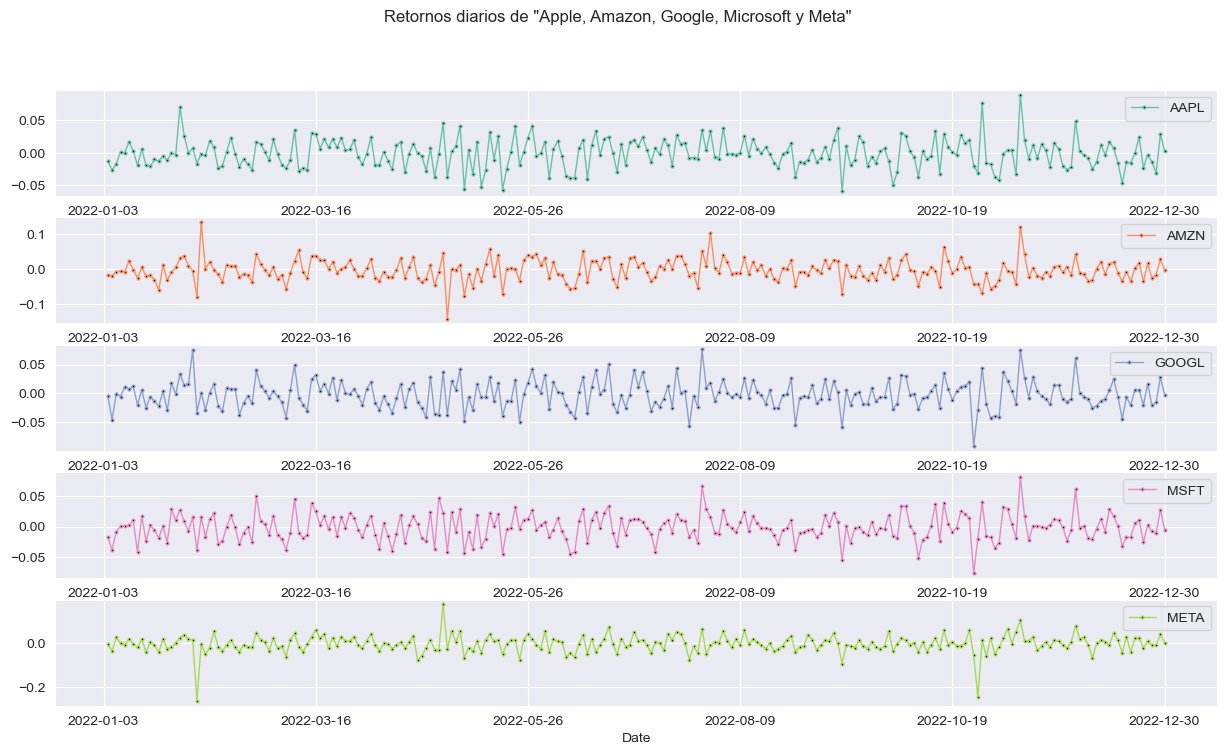

             AAPL        AMZN       GOOGL        MSFT        META
count  250.000000  250.000000  250.000000  250.000000  250.000000
mean    -0.001074   -0.002329   -0.001689   -0.001049   -0.003262
std      0.022471    0.031571    0.024396    0.022289    0.040555
min     -0.058680   -0.140494   -0.091405   -0.077156   -0.263901
25%     -0.015816   -0.019864   -0.018165   -0.014975   -0.021762
50%     -0.001360   -0.002927   -0.002278   -0.001834   -0.002408
75%      0.013388    0.016305    0.013213    0.012852    0.016869
max      0.088975    0.135359    0.076557    0.082268    0.175936


In [7]:
# Calculando el retorno diario de las acciones
stocks_returns = stocks_data.pct_change()

# Graficamos los retornos diarios
fig, ax = plt.subplots(figsize=(15, 8))
stocks_returns.plot(marker='o',markersize=2,markerfacecolor='k',title='Retornos diarios de "Apple, Amazon, Google, Microsoft y Meta"', lw=1, subplots=True, ax=ax)
plt.show()

# Datos estadísticos sumarios del retorno acciones
print(stocks_returns.describe())

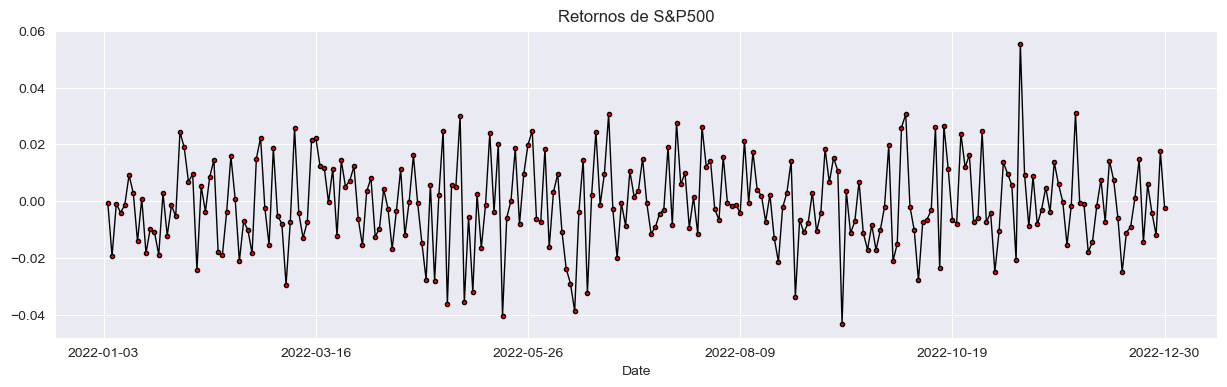

count    250.000000
mean      -0.000774
std        0.015252
min       -0.043237
25%       -0.010036
50%       -0.001609
75%        0.009505
max        0.055434
Name: Close, dtype: float64


In [8]:
# Calculamos el retorno diario nuestro índice de referencia referencia (S&P 500)
sp_returns = benchmark_data['Close'].pct_change()

# Graficamos el retorno diario
plt.figure(figsize=(15,4))
sp_returns.plot(marker='o',markersize=3,markerfacecolor='r', title='Retornos de S&P500', lw=1, color='k')
plt.show()

# Datos estadísticos sumarios del retorno de S&P 500
print(sp_returns.describe())

C:\Users\usuario\AppData\Local\Temp\ipykernel_12372\3147515603.py:7: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  excess_returns.plot(marker='o', markersize=2,markerfacecolor='k', title='"Diferencia de rendimiento relativo de acciones vs. S&P 500".', lw=1, subplots=True, ax=ax)


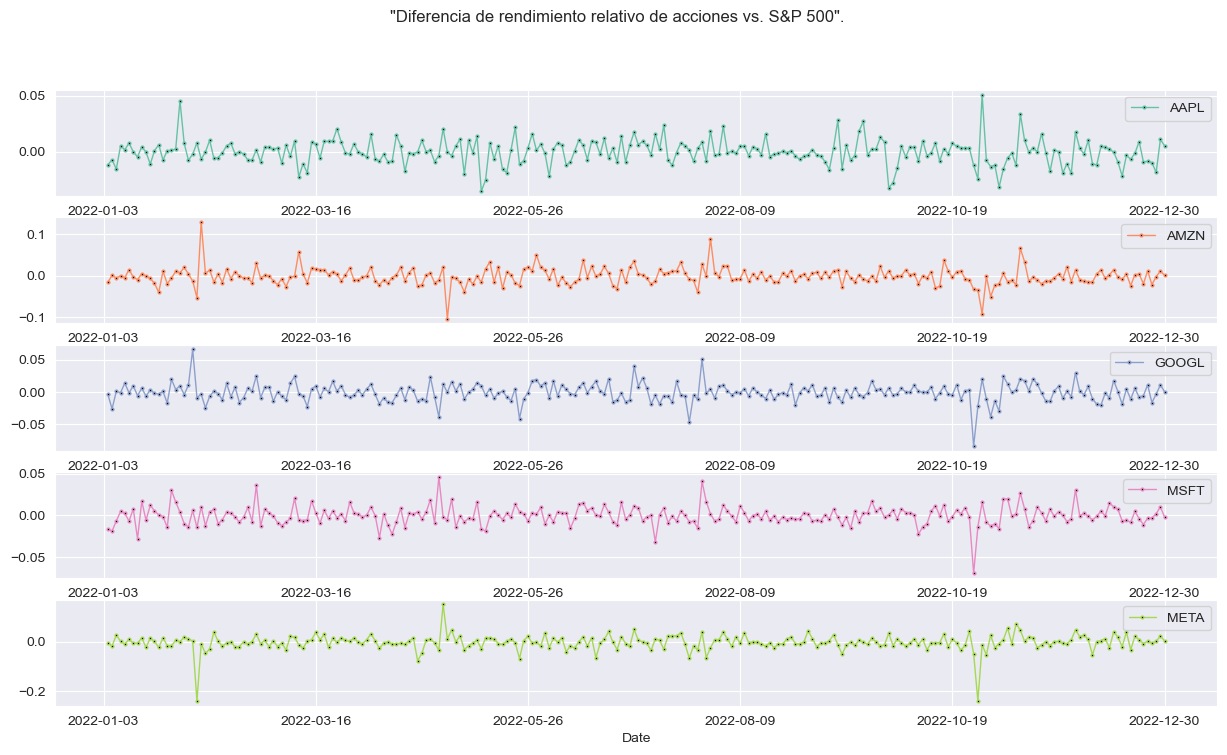

             AAPL        AMZN       GOOGL        MSFT        META
count  250.000000  250.000000  250.000000  250.000000  250.000000
mean    -0.000300   -0.001555   -0.000915   -0.000275   -0.002488
std      0.011405    0.021609    0.014241    0.011482    0.032664
min     -0.035378   -0.104210   -0.084017   -0.069769   -0.239510
25%     -0.007190   -0.013098   -0.008472   -0.006875   -0.014199
50%     -0.000376   -0.002186   -0.001176   -0.000708   -0.001360
75%      0.005594    0.009496    0.006625    0.004765    0.011577
max      0.050926    0.130202    0.065815    0.046011    0.151189


In [9]:
# Calculando la diferencia entre las acciones y S&P500
excess_returns = stocks_returns.sub(sp_returns, axis=0)

# Graficamos las diferencias

fig, ax = plt.subplots(figsize=(15, 8))
excess_returns.plot(marker='o', markersize=2,markerfacecolor='k', title='"Diferencia de rendimiento relativo de acciones vs. S&P 500".', lw=1, subplots=True, ax=ax)
plt.show()

# Datos estadísticos sumarios de la diferencia de retornos
print(excess_returns.describe())


#### Paso 1:
<p> La diferencia promedio en las devoluciones diarias de las acciones frente al S&P 500
En este paso, se calcula la diferencia entre las retorno diario de las acciones y las retorno diario del S&P 500. Esto se llama "exceso de retorno". Luego se calcula el promedio de estas diferencias para obtener una idea de cuánto más o menos las acciones están rindiendo por día en comparación con el S&P 500.</p>

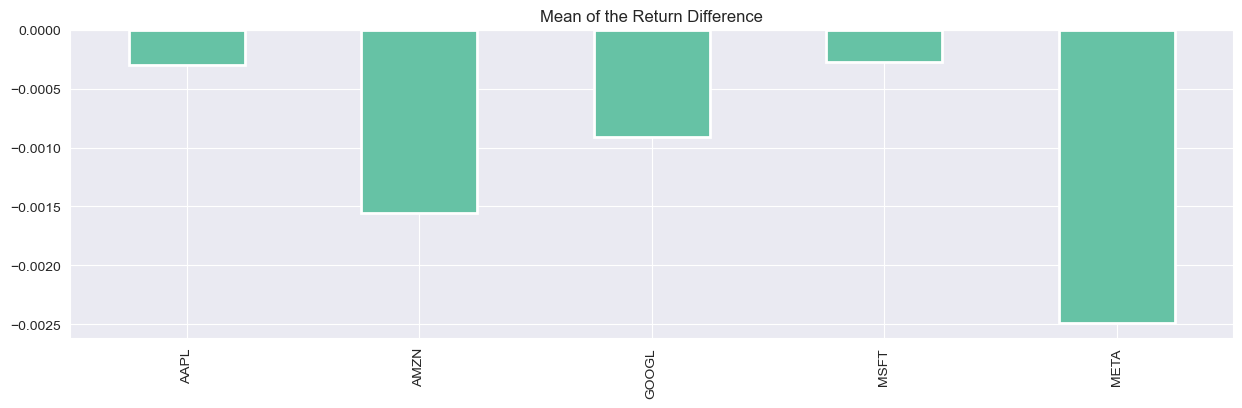

AAPL    -0.000300
AMZN    -0.001555
GOOGL   -0.000915
MSFT    -0.000275
META    -0.002488
dtype: float64


In [10]:
# Calculamos el promedio de la diferencia del retorno RELATIVO
avg_excess_return = excess_returns.mean()

# Graficamos
plt.figure(figsize=(15,4))
avg_excess_return.plot(kind='bar', title='Mean of the Return Difference', lw=2)
plt.show()

print(avg_excess_return)

#### Paso 2: 
<p>Desviación estándar de la diferencia de retorno
En este paso, se calcula la desviación estándar de las diferencias del retorno que se calcularon en el paso anterior. Esto mide cuánto más riesgo implica invertir en las acciones en comparación con el S&P 500.</p>

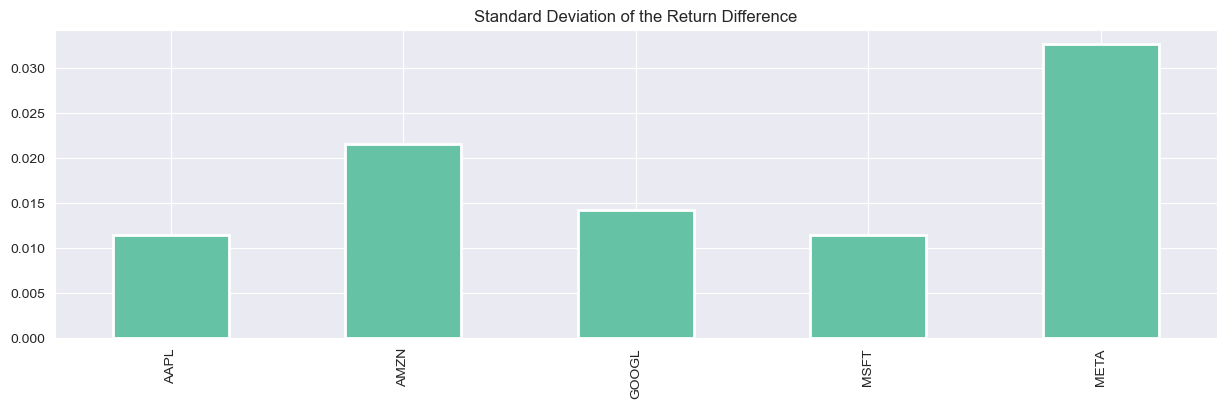

AAPL     0.011405
AMZN     0.021609
GOOGL    0.014241
MSFT     0.011482
META     0.032664
dtype: float64


In [11]:
# Calculamos las desviaciones std.
sd_excess_return = excess_returns.std()

# Graficamos
plt.figure(figsize=(15,4))
sd_excess_return.plot(kind='bar', title='Standard Deviation of the Return Difference', lw=2)
plt.show()

print(sd_excess_return)

#### Calculando el Sharpe Ratio

<p>Primero se divide el promedio de las diferencias de retorno (calculado en el paso 1) por la desviación estándar de las diferencias de retorno (calculado en el paso 2)</p>. <br> <p>El resultado es el Ratio de Sharpe, que indica cuánto más o menos retorno tiene la oportunidad de inversión considerada por unidad de riesgo.</p> <br>
<p>Luego el Ratio de Sharpe se anualiza multiplicándolo por la raíz cuadrada del número de períodos (en este caso, días de negociación) en un año. Esto hace que sea más fácil comparar el Ratio de Sharpe entre diferentes inversiones y en diferentes períodos de tiempo.</p>

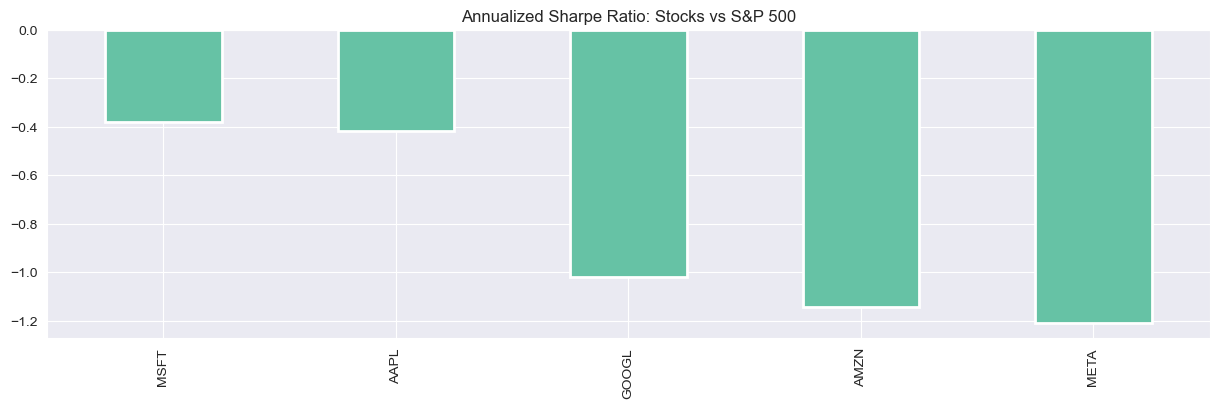

Sharpe Ratio diario: 

 MSFT    -0.023915
AAPL    -0.026267
GOOGL   -0.064232
AMZN    -0.071971
META    -0.076179
dtype: float64 

Sharpe Ratio anualizado: 

 MSFT    -0.379641
AAPL    -0.416979
GOOGL   -1.019648
AMZN    -1.142508
META    -1.209310
dtype: float64


In [12]:
# Calculamos el Sharpe Ratio diario
daily_sharpe_ratio = avg_excess_return.div(sd_excess_return).sort_values(ascending=False)

# Anualizamos
annual_factor = np.sqrt(252)
annual_sharpe_ratio = daily_sharpe_ratio.mul(annual_factor).sort_values(ascending=False)

# Graficamos el Ratio anualizado
plt.figure(figsize=(15,4))
annual_sharpe_ratio.plot(kind='bar', title='Annualized Sharpe Ratio: Stocks vs S&P 500', lw=2)
plt.show()

print(f'Sharpe Ratio diario: \n\n {daily_sharpe_ratio} \n')
print(f'Sharpe Ratio anualizado: \n\n {annual_sharpe_ratio}')

En resumen, para calcular el índice de Sharpe en series de tiempo, se debe utilizar un enfoque de ventana móvil para reflejar los cambios en la rentabilidad y la volatilidad a lo largo del tiempo, y se debe seleccionar una tasa libre de riesgo que refleje el período de tiempo en el que se está haciendo el cálculo.

In [13]:
print(f'benchmark_data: \n{benchmark_data}\n stocks_data: \n{stocks_data}')

benchmark_data: 
                  Close
Date                   
2022-01-03  4796.560059
2022-01-04  4793.540039
2022-01-05  4700.580078
2022-01-06  4696.049805
2022-01-07  4677.029785
...                 ...
2022-12-23  3844.820068
2022-12-27  3829.250000
2022-12-28  3783.219971
2022-12-29  3849.280029
2022-12-30  3839.500000

[251 rows x 1 columns]
 stocks_data: 
                  AAPL        AMZN       GOOGL        MSFT        META
Date                                                                  
2022-01-03  180.683868  170.404495  144.991501  330.813843  338.540009
2022-01-04  178.390717  167.522003  144.399506  325.141357  336.529999
2022-01-05  173.645523  164.356995  137.774994  312.659882  324.170013
2022-01-06  170.746796  163.253998  137.747498  310.189270  332.459991
2022-01-07  170.915573  162.554001  137.016998  310.347412  331.790009
...                ...         ...         ...         ...         ...
2022-12-23  131.658981   85.250000   89.230003  238.133545  118.